# A Tour of Machine Learning Classifiers Using scikit-learn

In this chapter, we will take a tour through a selection of popular and powerful machine learning algorithms that are commonly used in academia as well as in industry. While learning about the differences between several supervised learning algorithms for classification, we will also develop an intuitive appreciation of their individual strengths and weaknesses. In addition, we will take our first step with the scikit-learn library, which offers a user-friedly interface for using those algorithms efficiently and productively. 

The topics that we will learn about throughout this chapter are as follows: 
* Introduction to robust and popular algorithms for classification, such as logistic regression, support vector machines, and decision trees
* Examples and explanations using the scikit-learn machine learning library, which provides a wide variety of machine learning algorithms via a user-friedly Python API
* Discussion about the strengths and weaknesses of classifiers with linear and non-linear decision boundaries

# Choosing a classification algorithm

Choosing an appropriate classification algorithm for a particular problem task requires practice; each algorithm has it own quirks and is based on certain assumptions. To restate the No Free Lunch theorem by David H. Wolpert, no single classifier works best across all posible scenarios. In practice, it is always recommended that you compare the performance of at least a handful of different learning algorithms to select the best model for the particular problem; these may differ in the number of features or samples, the amount of noise in the dataset, and whether the class is linearly separable or not. 

Eventually, the performance of a classifier; computational performance as well as predictive power; depends heavily on the underlying data that is available for learning. The five main steps that are involved in training a machine learning algorithm can be summarized as follows: 

1. Selecting features and collectiong training samples. 
2. Choosing a performance metric. 
3. Choosing a classifier and optimization algorithm. 
4. Evaluating the performance of the model. 
5. Tuning the algorithm. 

Since the approach of this book is to build machine learning knowledge step by step, we will mainly focus on the main concepts of the different algorithms in this chapter and revisit topics such as feature selection and preprocessing, performance metrics, and hyperparameter tuning for more detailed discussions later in this book. 

# First steps with scikit-learn: Training a perceptron

In previous chapter, you learned about two related learning algorithms for classification, the perceptron rule and Adaline, which we implemented in Python by ourselves. Now we will take a look at the scikit-learn API, which combines a user-friendly interface with a highly optimized implementation of several classification algorithms. The scikit-learn library offers not only a large variety of learning algorithms, but also many convenient functions to preprocess data and to fine-tune and evaluate our models. 

To get started with the scikit-learn library, we will train a perceptron model similar to the one that we implemented previously. For simplicity, we will use the already familiar Iris dataset throughout the following sections. Conveniently, the Iris dataset is already available via scikit-learn, since it is a simple yet popular dataset that is frequently used for testing and experimenting with algorithms. We will only use two features from the Iris dataset for visualization purposes. 

We will assign the petal length and petal width of the 150 flower samples to the feature matrix *X* and the corresponding class labels of the flower species to the vector *y*: 

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


The *np.unique(y)* function returned the three unique class labels stored in *iris.target*, and as we see, the Iris flower class *Iris-setosa*, *Iris-versicolor*, and *Iris-virginica* are already stored as integers (here, 0, 1, 2). Although many scikit-learn functions and class methods also work with class labels in string format, using integer labels is a recommended approach to avoid technical glitches and improve computational performance due to a smaller memory footprint; furthermore, encoding class labels as integers is a common convention among most machine learning libraries. 

To evaluate how well a trained model performs on unseen data, we will further split the dataset into separate training and test datasets. Later we will discuss the best practices around model evaluation in more detail: 

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

Using the *train_test_split* function from scikit-learn's *model_selection* module, we randomly split the *x* and *y* arrays into 30 percent test data (45 samples) and 70 percent training data (105 samples). 

Note that the *train_test_split* function already shuffles the training sets internally before splitting; otherwise, all class 0 and class 1 samples would have ended up in the training set, and the test set would consist of 45 samples of class 2. Via the *random_state* parameter, we provided a fixed random seed (*random_state=1*), for the internal pseudo-random number generator that is used for shuffling the datasets prior to splitting. Using such as fixed *random_state* ensures that our results are reproducible. 

Lastly, we took advantage of the built-in support for stratification via *stratify=y*. In this context, stratification means that the *train_test_split* method returns a training and test subsets that have the same proportions of class labels as the input dataset. We can use NumPy's *bincount* function, which counts the number of occurrences of each value in an array, to verify that this is indeed the case: 

In [3]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


Many machine learning and optimization algorithms also require feature scaling for optimal performance, as we remember from the **gradient descent** examples in previous chapter. Here, we will standardize the features using the *StandardScaler* class from scikit-learn's *preprocessing* module: 

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Using the preceding code, we loaded the *StandardScaler* class from the *preprocessing* module and initialized a new *StandardScaler* object that we assigned to the *sc* variable. Using the *fit* method, *StandardScaler* estimated the parameters $\mu$ (sample mean) and $\sigma$ (standard deviation) for each feature dimension from the training data. By calling the *transform* method, we then stardardized the training data using those estimated parameters $\mu$ and $\sigma$. Note that we used the same scaling parameters to standardize the test set so that both the values in the training and test dataset are comparable to each other. 

Having stardardized the training data, we can now train a perceptron model. Most algorithms in scikit-learn already support multiclass classification by default via *One-versus-Rest (OvR)* method, which allows us to feed the three flower classes to the perceptron all at once. The code is as follows: 

In [5]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

/usr/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=40, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=None, verbose=0, warm_start=False)

The scikit-learn interface remind us of our perceptron implementation in previous chapter: after loading the *Perceptron* class from the *linear_model* module, we initialized a new *Perceptron* object and trained the model via the *fit* method. Here, the model parameter *eta0* is equivalent to the learning rate *eta* that we used in our own perceptron implementation, and the *n_iter* parameter defines the number of epochs (passes over the training set). 

As we remember from previous chapter, findind and appropriate learning rate requires some experimentation. If the learning rate is too large, the algorithm will overshoot the global cost minimum. If the learning rate is too small, the algorithm requires more epochs until convergence, which can make the learning slow, specially for large datasets. Also, we used the *random_state* parameter to ensure the reproducibility of the initial shuffling of the training dataset after each epoch. 

Having trained a model in *scikit-learn*, we can make predictions via the *predict* method, just like in our own perceptron implementation. The code is as follows: 

In [6]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 3


Executing the code, we see that the perceptron misclassifies three out of the 45 flower samples. Thus, the misclassification error on the dataset is approximately *0.067* or *6.7* percent ($3/45 \approx 0.067$). 

Instead of the misclassification **error**, many machine learning practitioners report the classification **accuracy** of a model, which is simply calculated as follows: 

$$1-error = 0.933\ \text{or 93.3 percent}$$

The scikit-learn library also implements a large variety of different perfomance metrics that are available via the *metrics* module. For example, we can calculate the classification accuracy of the perceptron on the test set as follows:

In [8]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.93


Here, *y_test* are the true class labels and *y_pred* are the class labels that we predicted previously. Alternatively, each classifier in scikit-learn has a *score* method, which computes a classifier's prediction accuracy by combining the predict class with *accuracy_score* method as shown here:

In [9]:
print('Accuracy: %.2f' % ppn.score(X_test_std, y_test))

Accuracy: 0.93


Note that we evaluate the performance of our models based on the test set in this chapter. Later you will learn about useful techniques, including graphical analysis such as learning curves, to detect and prevend **overfitting**. Overffiting means that the model captures the patters in the training data well, but fails to generalize well to unseen data. 

Finally, we can use our *plot_decision_regions* function to plot the **decision regions** of our newly trained perceptron model and visualize how well it separates the different flower samples. However, let's add a small modification to highlight the samples from the tes dataset via small circles: 

In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, 
                          resolution=0.02):
    #setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 0].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], 
                    alpha=0.8, c=colors[idx], 
                    marker=markers[idx], label=cl, 
                    edgecolor='black')
    
    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', 
                    edgecolor='black', alpha=1.0, 
                    linewidth=1, marker='o', 
                    s=100, label='test set')

With the slight modification that we made to the *plot_decision_regions* function, we can now specify the indices of the samples that we want to mark on the resulting plots. The code is as follows: 

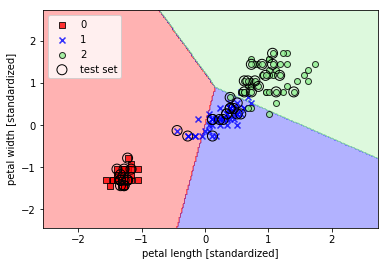

In [11]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, 
                      classifier=ppn, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

Remember that the perceptron algorithm never converges on datasets that are not perfectly linearly separable, which is why the use of the perceptron algorithm is typically not recommended in practice. In the following sections, we will look at more powerful linear classifiers that converge to a cost minimum even if the classes are not perfectly linearly separable. 

# Modeling class probabilities via logistic regression

Although the perceptron rule offers a nice and easygoing introduction to machine learning algorithms for classification, its biggest disadvantage is that it never converges if the class are not perfectly linearly separable. The classification task in the previous section would be an example of such a scenario, Intuitively, we can think of the reason as the weights are continuously being updated since there is always at least one misclassified sample present in each epoch. Of course, you can change the learning rate and increase the number of epochs, but be warned that the perceptron will never converge on this dataset. To make better use of our time, we will now take a look at another simple yet more powerfull algorithm for linear and binary classification problems: **logistic regression**. Note that, in spite of its name, logistic regression is a model for classification, not regression. 

# Logistic regression intuition and conditional probabilities

Logistic regression is a classification model that is very easy to implement but performs very well on linearly separable classes. It is one of the most widely used algorithms for classification in industry. Similar to the perceptron and Adaline, the logistic regression model in this chapter is also a linear model for binary classification that can be extended to multiclass classification, for example, via the OvR technique. 

To explain the idea behind logistic regression as a probabilistic model, let's first introduce the **odds ratio**: the odds in favor of a particular event. The odds ratio can be written as $\frac{p}{1-p}$ where $p$ stands for the probability of the positive event. The term *positive event* does not necessarily mean *good*, but refers to the event that we can want to predict, for example, the probability that a patient has a certain disease; we can think of the positive event as class label $y = 1$. We can then further define the *logit* function, which is simply the logarithm of the odds ratio (log-odds): 

$$\text{logit}(p) = \log\frac{p}{(1-p)}$$

Note that *log* refers to the natural logarithm, as it is the common convention in computer science. The *logit* function takes as input values in the range 0 to 1 and transforms them to values over the entire real-number range, which we can use to express a linear relationship between feature values and the log-odds: 

$$\text{logit}(p(y = 1 | x)) = w_0x_0 + w_1x_1 + ... + w_mx_m = \sum_{i=0}^{m}w_ix_i = w^Tx$$

Here, $p(y = 1 | x)$ is the condition probability that a particular sample belongs to class 1 given its features $x$. 

Now, we are actually interested in predicting the probability that a certain sample belongs to a particular class, which is the inverse form of the *logit* function. It is also called **logistic sigmoid function**, sometimes simply abbreviated to **sigmoid function** due to its characteristic S-shape:

$$\phi(z) = \frac{1}{1+e^{-z}}$$

Here $z$ is the net input, the linear combination of weights and sample features, $z = w^Tx = w_0x_0 + w_1x_1 + ... + w_mx_m$. 

Note that $w_0$ refers to the bias unit, and is an additional input value that we provide $x_0$, which is set equal to 1. 

Now let us simply plot the sigmoid function for some values in the range -7 to 7 to see how it looks:

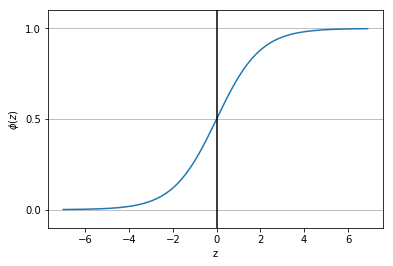

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z): 
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi(z)$')
# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.show()

We can see that $\phi(z)$ approaches 1 if $z$ goes towards infinity ($z \to \infty$ since $e^{-z}$ becomes very small for large values of z. Similarly, $\phi(z)$ goes towards 0 for $z \to -\infty$ as a result of an increasingly large denominator. Thus, we conclude that this sigmoid function takes real number values as input and transform them into values in the range [0, 1] with an intercept at $\phi(z)=0.5$. 

To build some intuition for the logistic regression model, we can relate it to previous chapter. In Adaline, we used the identity function $\phi(z) = z$ as the activation function. In logistic regression, this activation function simply becomes the sigmoid function that we defined earlier. The difference between Adaline and logistic regression is illustrated in the following figure: 

<img src='images/03_03.png'>

The output of the sigmoid function is then interpreted as the probability of a particular sample belonging to class 1, $\phi(z) = P(y = 1 | x;w)$, given its features $x$ parameterized by the weights $w$. For example, if we compute $\phi(z) = 0.8$ for a particular flower sample, it means that the chance that this sample is an *Iris-versicolor* flower is 80 percent. Therefore, the probability that this flower is an *Iris-setosa* flower can be calculated as $P(y = 0 | x;w) = 1 - P(y = 1 | x;w) = 0.2$ or 20 percent. The predicted probability can then simply be converted into a binary outcome via a threshold function:

\begin{equation}
ŷ = 
\begin{cases}
   1, & \text{if}\ \phi(z) \ge 0.5 \\
   0, & \text{otherwise}
\end{cases}
\end{equation}

If we look at the preceding plot of the sigmoid function, this is equivalent to the following: 

\begin{equation}
ŷ = 
\begin{cases}
   1, & \text{if}\ z \ge 0.0 \\
   0, & \text{otherwise}
\end{cases}
\end{equation}

In fact, there are many applications where we are not only interested in the predicted class labels, but where the estimation of the class-memberships probability is particularly useful (the output of the sigmoid function prior to applying the threshold function). Logistic regression is used in weather forecasting, for example, not only to predict if it will rain on a particular day but also to report the chance of rain. Similarly, logistic regression can be used to predict the chance that a patient has a particular disease given certain symptoms, which is why logistic regression enjoys great popularity in the field of medicine. 